In [2]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
# Predict reconstruction loss on the test set
test_loss = autoencoder.evaluate(x_test, x_test)
print(f"Reconstruction Loss on Test Set: {test_loss}")

Epoch 1/5
235/235 [==============================] - 7s 26ms/step - loss: 0.6947 - val_loss: 0.6946
Epoch 2/5
235/235 [==============================] - 3s 11ms/step - loss: 0.6945 - val_loss: 0.6945
Epoch 3/5
235/235 [==============================] - 2s 10ms/step - loss: 0.6944 - val_loss: 0.6943
Epoch 4/5
235/235 [==============================] - 2s 10ms/step - loss: 0.6942 - val_loss: 0.6941
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.6939
Reconstruction Loss on Test Set: 0.6939055919647217


Epoch 1/50
235/235 [==============================] - 6s 22ms/step - loss: 0.6935 - val_loss: 0.6934
Epoch 2/50
235/235 [==============================] - 5s 20ms/step - loss: 0.6935 - val_loss: 0.6934
Epoch 3/50
235/235 [==============================] - 4s 18ms/step - loss: 0.6934 - val_loss: 0.6933
Epoch 4/50
235/235 [==============================] - 5s 22ms/step - loss: 0.6933 - val_loss: 0.6932
Epoch 5/50
235/235 [==============================] - 5s 20ms/step - loss: 0.6933 - val_loss: 0.6932
Epoch 6/50
235/235 [==============================] - 4s 18ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 7/50
235/235 [==============================] - 5s 22ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 8/50
235/235 [==============================] - 5s 20ms/step - loss: 0.6931 - val_loss: 0.6930
Epoch 9/50
235/235 [==============================] - 4s 17ms/step - loss: 0.6931 - val_loss: 0.6930
Epoch 10/50
235/235 [==============================] - 5s 21ms/step - loss: 0.6930 - val_lo

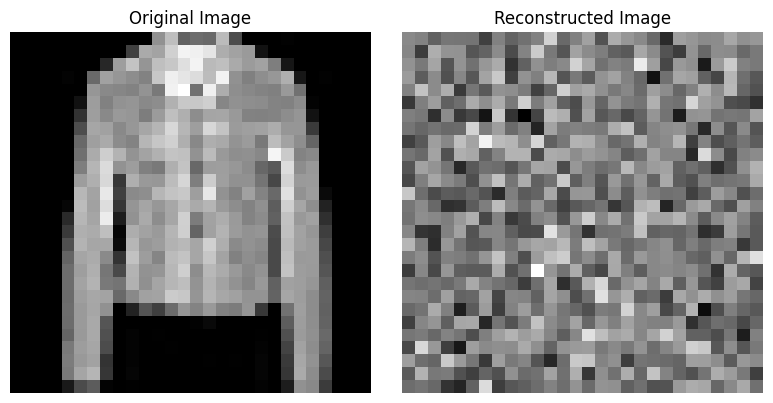

In [14]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.optimizers import Adadelta

# Define the size of the encoded representations
encoding_dim = 22  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# Input placeholder
input_img = Input(shape=(784,))

# Example of adding more layers
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)
encoded = Dropout(0.2)(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)


# Autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer=Adadelta(learning_rate=0.001), loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
import matplotlib.pyplot as plt
# Predict reconstruction loss on the test set
test_loss = autoencoder.evaluate(x_test, x_test)
print(f"Reconstruction Loss on Test Set: {test_loss}")

# Predict on test data
decoded_imgs = autoencoder.predict(x_test)

# Choose a random test image index
index = 10

# Plotting the original image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Plotting the reconstructed image
plt.subplot(1, 2, 2)
plt.imshow(decoded_imgs[index].reshape(28, 28), cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.tight_layout()
plt.show()


Epoch 1/25
235/235 [==============================] - 6s 22ms/step - loss: 0.6946 - val_loss: 0.6934
Epoch 2/25
235/235 [==============================] - 6s 26ms/step - loss: 0.6944 - val_loss: 0.6932
Epoch 3/25
235/235 [==============================] - 5s 21ms/step - loss: 0.6943 - val_loss: 0.6931
Epoch 4/25
235/235 [==============================] - 6s 26ms/step - loss: 0.6941 - val_loss: 0.6930
Epoch 5/25
235/235 [==============================] - 5s 21ms/step - loss: 0.6939 - val_loss: 0.6928
Epoch 6/25
235/235 [==============================] - 5s 20ms/step - loss: 0.6937 - val_loss: 0.6927
Epoch 7/25
235/235 [==============================] - 6s 27ms/step - loss: 0.6936 - val_loss: 0.6926
Epoch 8/25
235/235 [==============================] - 5s 21ms/step - loss: 0.6934 - val_loss: 0.6925
Epoch 9/25
235/235 [==============================] - 6s 25ms/step - loss: 0.6933 - val_loss: 0.6923
Epoch 10/25
235/235 [==============================] - 5s 22ms/step - loss: 0.6931 - val_lo

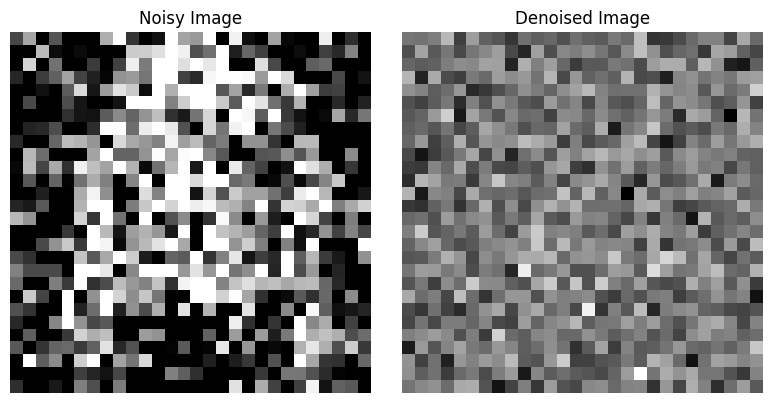

Epoch 1/25
235/235 [==============================] - 5s 21ms/step - loss: 0.6905 - val_loss: 0.6901
Epoch 2/25
235/235 [==============================] - 6s 26ms/step - loss: 0.6903 - val_loss: 0.6899
Epoch 3/25
235/235 [==============================] - 5s 20ms/step - loss: 0.6902 - val_loss: 0.6898
Epoch 4/25
235/235 [==============================] - 6s 26ms/step - loss: 0.6900 - val_loss: 0.6896
Epoch 5/25
235/235 [==============================] - 5s 21ms/step - loss: 0.6898 - val_loss: 0.6894
Epoch 6/25
235/235 [==============================] - 5s 20ms/step - loss: 0.6896 - val_loss: 0.6893
Epoch 7/25
235/235 [==============================] - 6s 27ms/step - loss: 0.6894 - val_loss: 0.6891
Epoch 8/25
235/235 [==============================] - 5s 20ms/step - loss: 0.6893 - val_loss: 0.6889
Epoch 9/25
235/235 [==============================] - 7s 29ms/step - loss: 0.6891 - val_loss: 0.6888
Epoch 10/25
235/235 [==============================] - 6s 27ms/step - loss: 0.6888 - val_lo

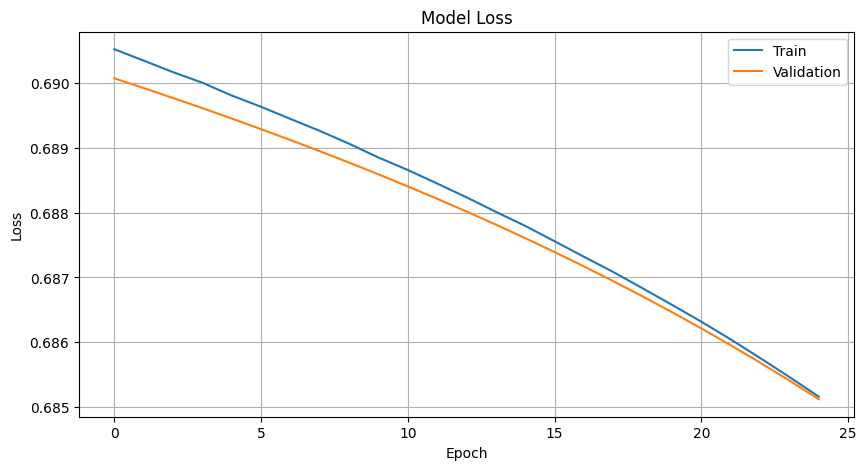

In [17]:
from keras.layers import Input, Dense, GaussianNoise
from keras.models import Model

# Define the size of the encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# Input placeholder
input_img = Input(shape=(784,))
# Add Gaussian noise to the input
noisy_input = GaussianNoise(0.5)(input_img)

# Encoding layers
encoded = Dense(128, activation='relu')(noisy_input)  # Added hidden layer with 128 neurons
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Decoding layers
decoded = Dense(128, activation='relu')(encoded)  # Added hidden layer with 128 neurons
decoded = Dense(784, activation='sigmoid')(decoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
# Add noise to the training data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
# Clip the values to stay within [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)

# Add noise to the test data, too
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
# Clip the values to stay within [0, 1]
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Train the denoising autoencoder
autoencoder.fit(x_train_noisy, x_train,
                epochs=25,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test)) # Pass noisy test data for validation
import matplotlib.pyplot as plt

# Predict on test data
decoded_imgs = autoencoder.predict(x_test_noisy) # Predict on noisy test data

# Choose a random test image index
index = 10

# Plotting the original (noisy) image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy[index].reshape(28, 28), cmap='gray') # Now x_test_noisy is defined
plt.title('Noisy Image')
plt.axis('off')

# Plotting the reconstructed (denoised) image
plt.subplot(1, 2, 2)
plt.imshow(decoded_imgs[index].reshape(28, 28), cmap='gray')
plt.title('Denoised Image')
plt.axis('off')

plt.tight_layout()
plt.show()
history = autoencoder.fit(x_train_noisy, x_train,
                          epochs=25,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test_noisy, x_test))
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(True)
plt.show()